In [27]:
from qiskit import * 
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [2]:
bit_num = qbit_num = 3
circuit = QuantumCircuit(qbit_num, bit_num)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

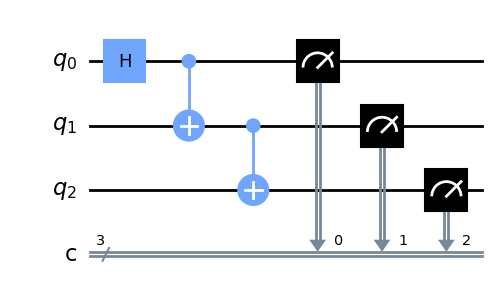

In [3]:
# visual 
%matplotlib inline
circuit.draw(output="mpl")

In [11]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1200).result()
counts = result.get_counts(circuit)

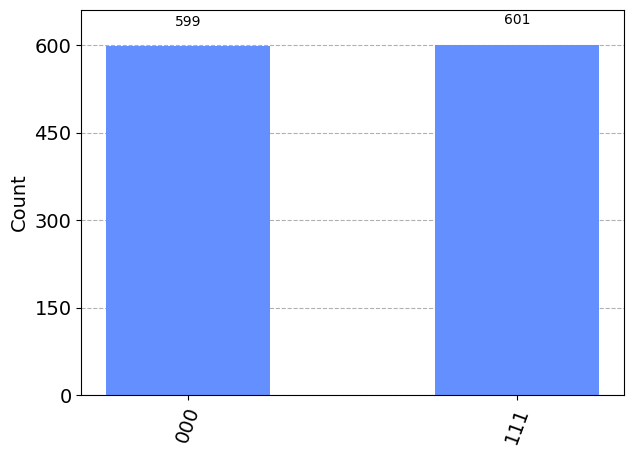

In [12]:
plot_histogram(counts)

In [14]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-24 16:22:18,729: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider = IBMQ.get_provider(hub="ibm-q")
device = provider.get_backend('ibmq_qasm_simulator')

In [19]:
job = execute(circuit, backend=device, shot=2000)
job_id = job.job_id()
print(job_id)

641d907425a5ac7ac8a5e4c1


In [22]:
job_monitor(job)

Job Status: job has successfully run


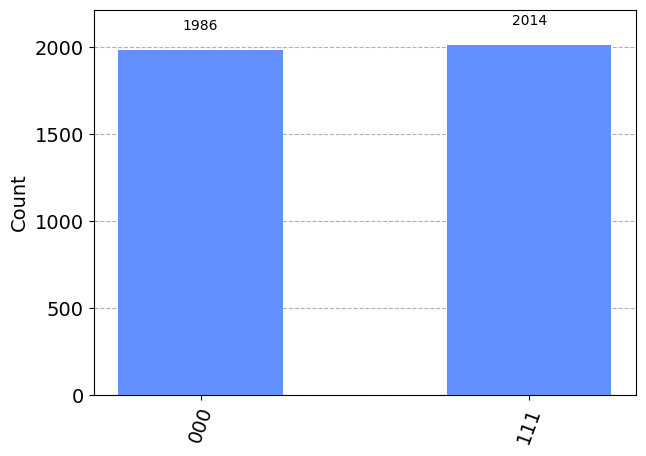

In [24]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [29]:
cal_circuit, state_labels = complete_meas_cal(qr= circuit.qregs[0], circlabel='measerrormitigationcal')

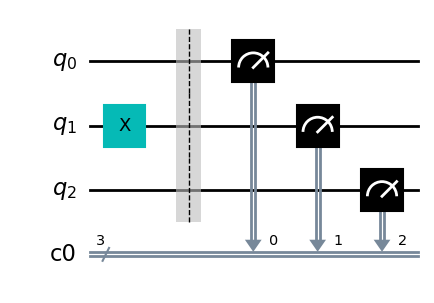

In [30]:
cal_circuit[2].draw(output="mpl")

In [31]:
# all posible states are 8 states 
# |000>, |001>, ..., |111>
len(cal_circuit)

8

### so thats correct

In [32]:
cal_job = execute(cal_circuit,
                 backend=device, 
                 shot=2000, 
                 optimization_level=0)


print(cal_job.job_id())

641d942a338b78d156d64287


In [33]:
job_monitor(cal_job)
cal_results = cal_job.result()

Job Status: job has successfully run


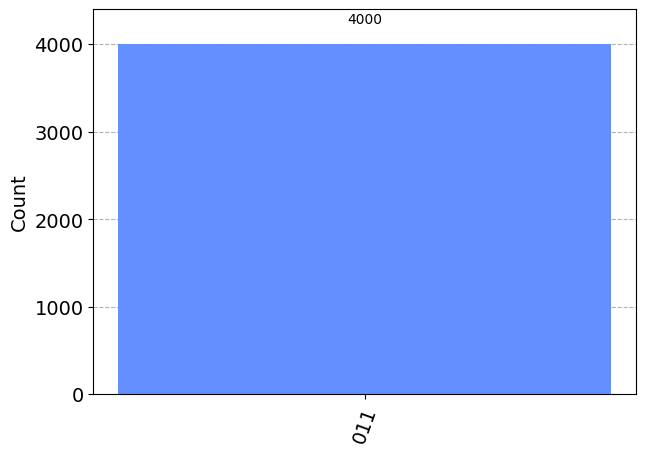

In [35]:
plot_histogram(cal_results.get_counts(cal_circuit[3]))

In [36]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

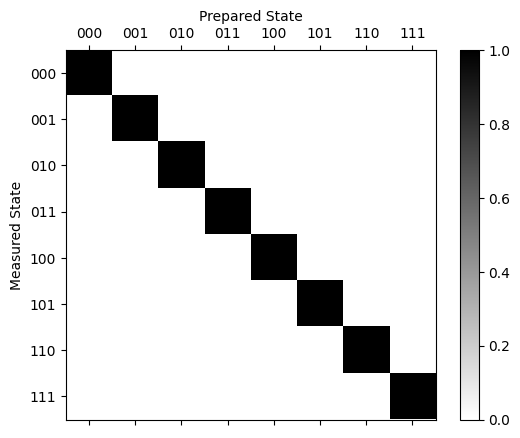

In [37]:
meas_fitter.plot_calibration()

In [38]:
meas_filter = meas_fitter.filter

In [39]:
mitigated_result = meas_filter.apply(device_result)

In [42]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)

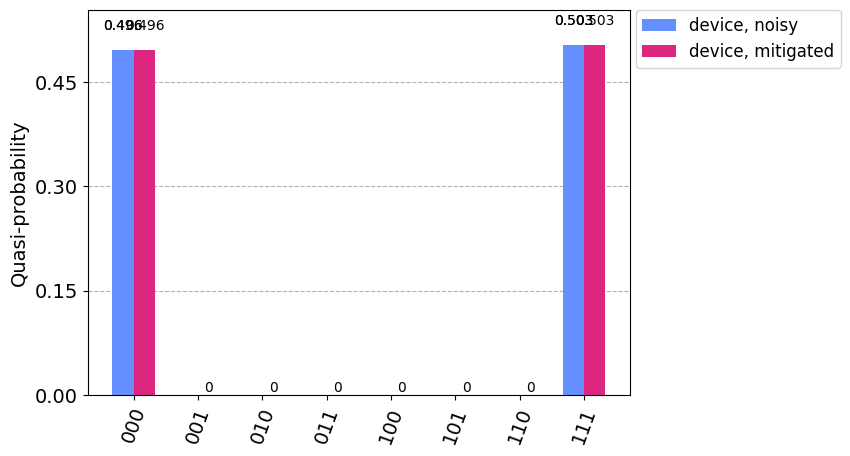

In [43]:
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

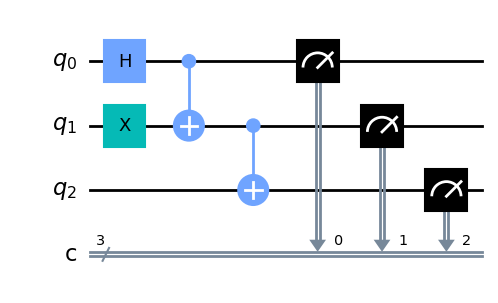

In [44]:
circuit2 = QuantumCircuit(3, 3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.cx(1, 2)
circuit2.measure([0, 1, 2], [0, 1, 2])
circuit2.draw(output="mpl")

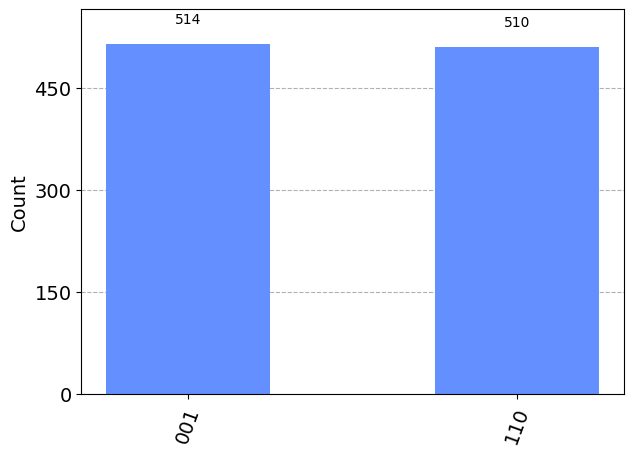

In [45]:
plot_histogram(execute(circuit2, backend=simulator, shot=2000).result().get_counts(circuit2))